In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [108]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [110]:
df.shape

(301, 9)

In [111]:
print("Fuel_Type :",df["Fuel_Type"].unique())
print("Seller_Type :",df["Seller_Type"].unique())
print("Transmission :",df["Transmission"].unique())
print("Owner :",df["Owner"].unique())

Fuel_Type : ['Petrol' 'Diesel' 'CNG']
Seller_Type : ['Dealer' 'Individual']
Transmission : ['Manual' 'Automatic']
Owner : [0 1 3]


In [112]:
current_year = 2020
df["no_of_Year"] = current_year - df["Year"]
df.drop(["Year"], axis=1, inplace=True)
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_Year
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [113]:
df.drop(["Car_Name"], axis=1, inplace=True)

In [114]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [115]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_Year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


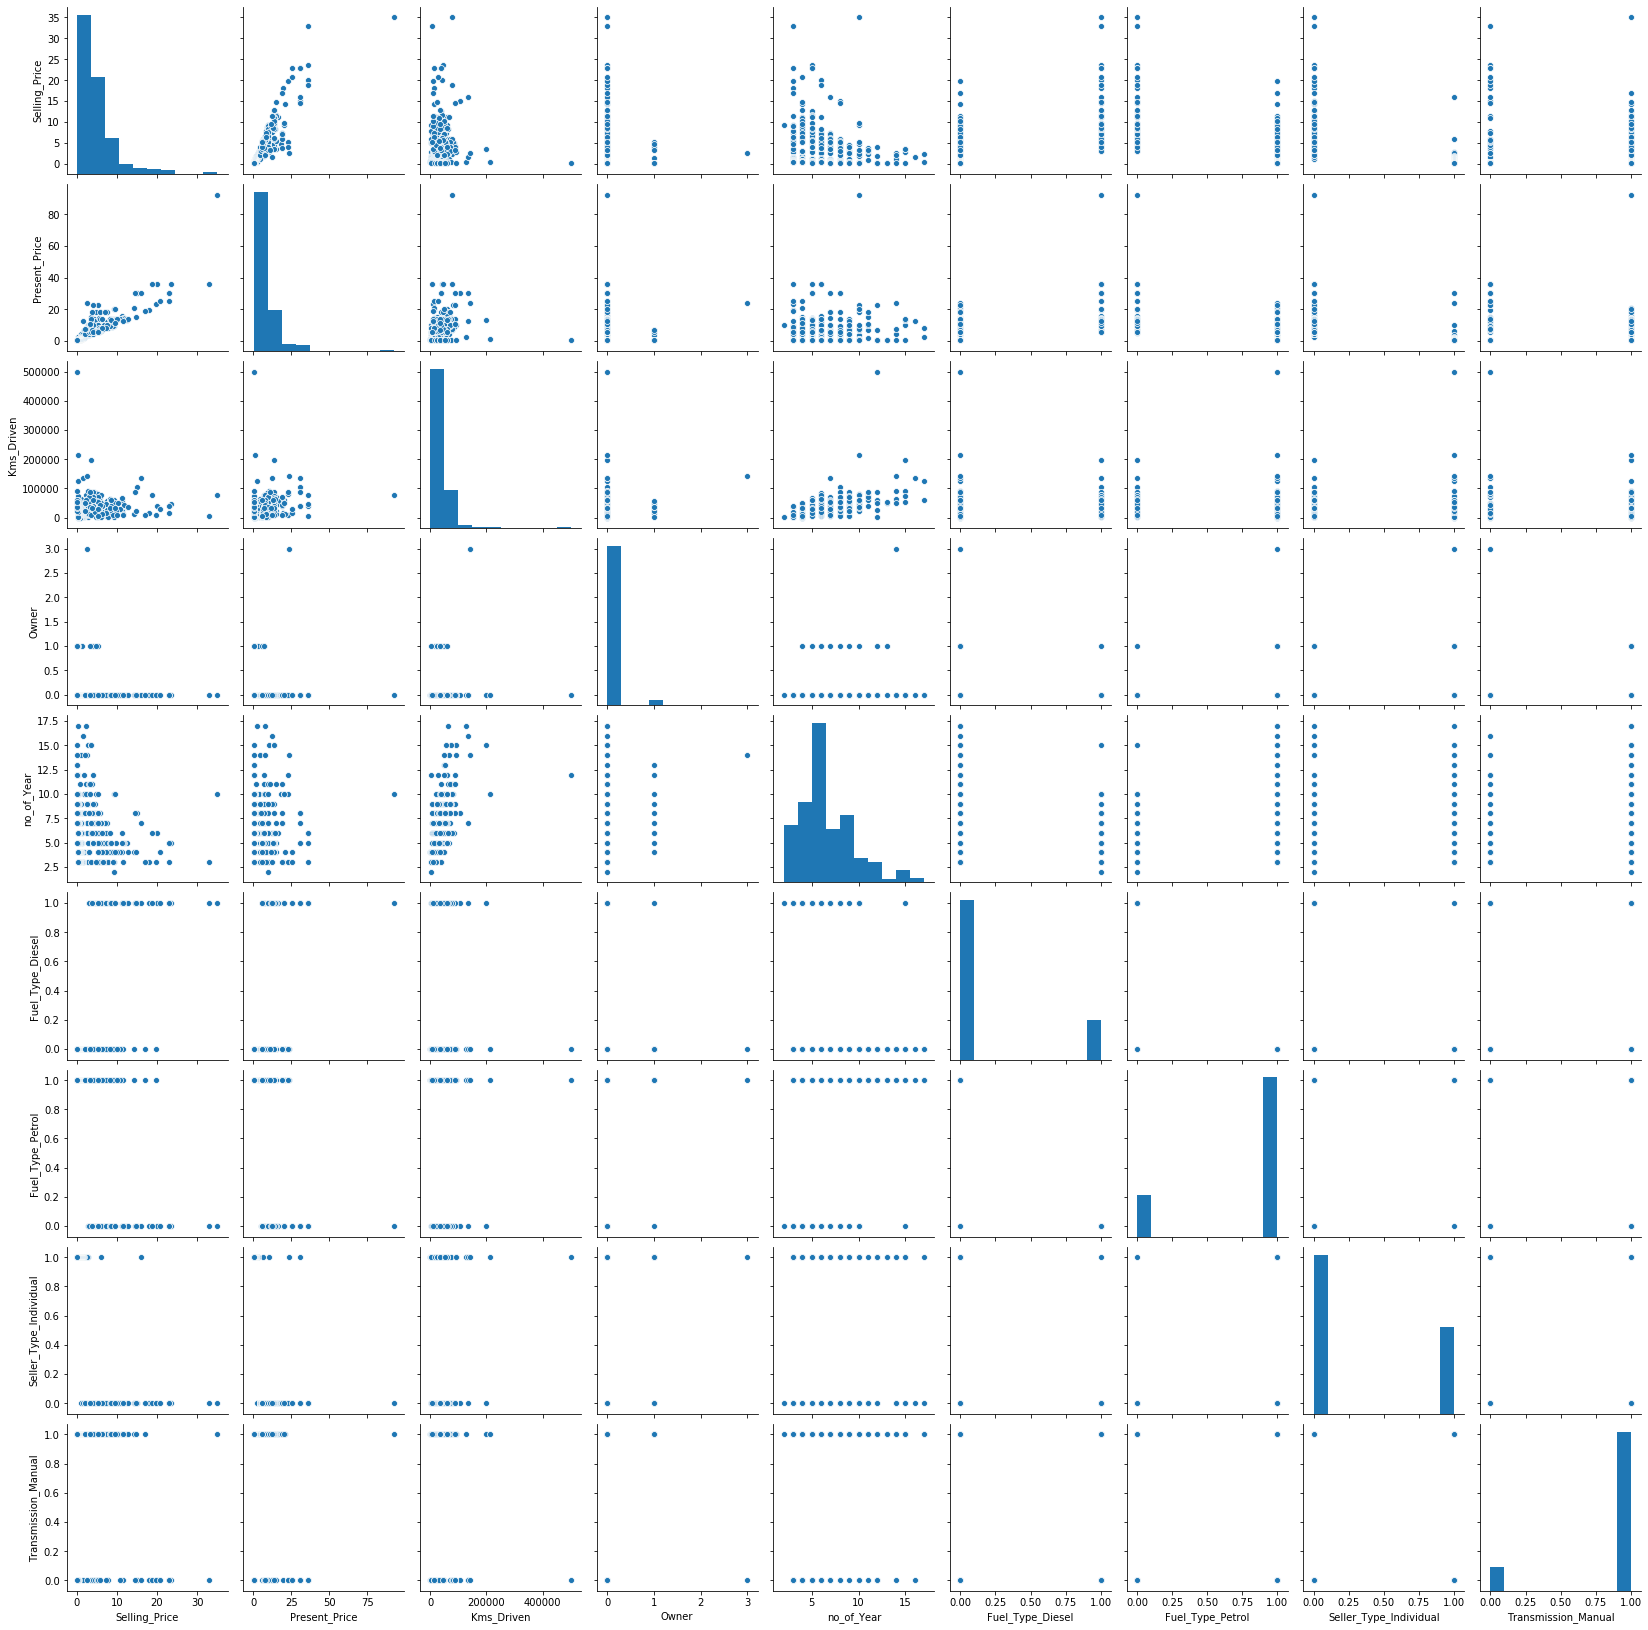

In [116]:
sns.pairplot(df)

corrmat.index : Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'no_of_Year',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')


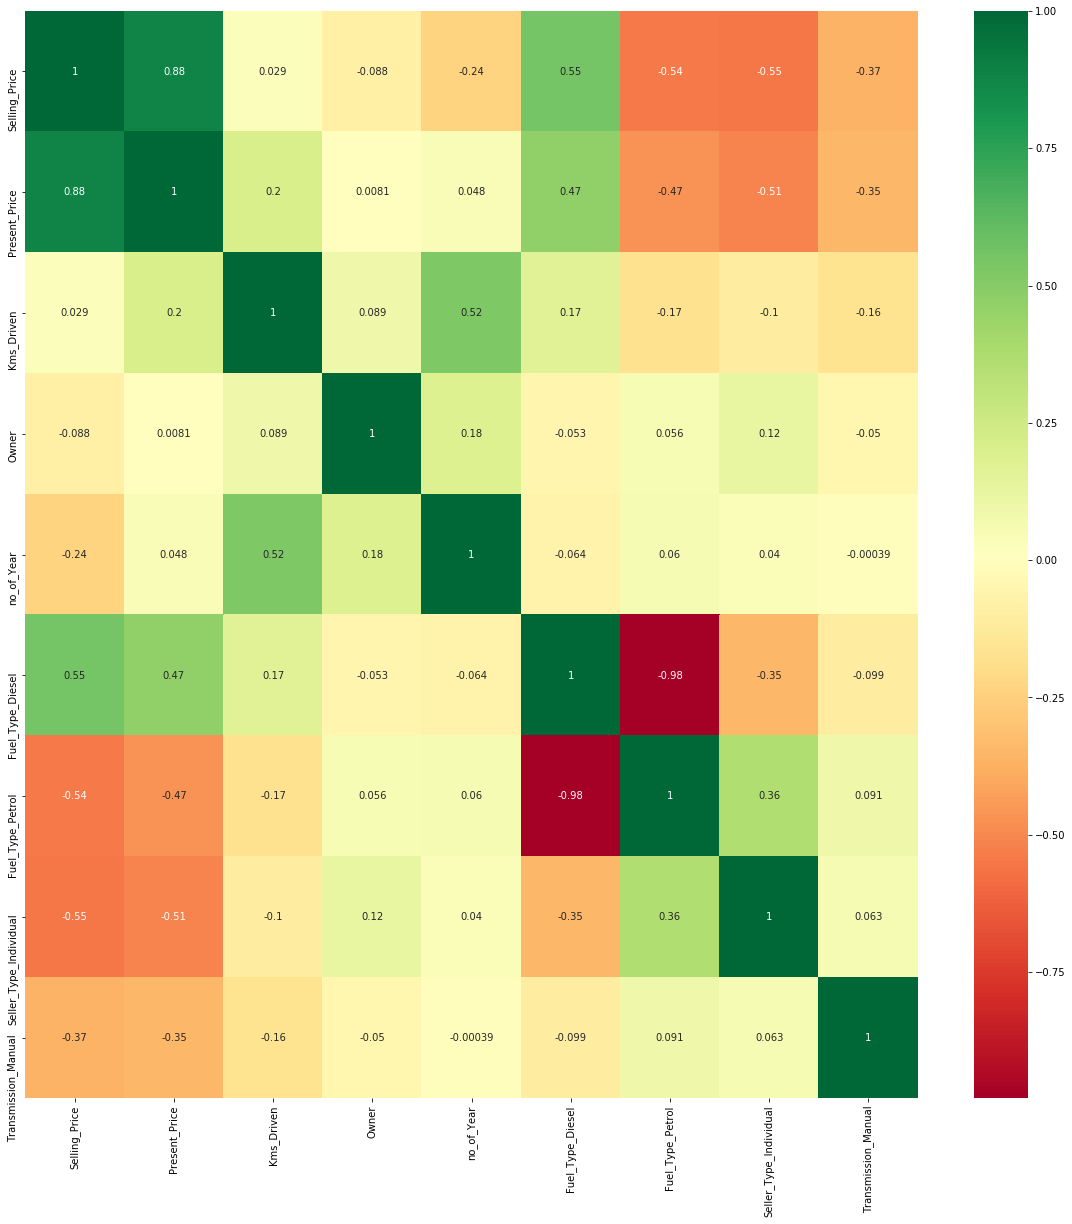

In [117]:
corrmat = df.corr()
print("corrmat.index : {}".format(corrmat.index))
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")


In [118]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [119]:
X.head()

,Present_Price,Kms_Driven,Owner,no_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [120]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [121]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [122]:
print(model.feature_importances_)

[0.38526682 0.04054614 0.00039443 0.08074312 0.22123975 0.00459485
 0.13248358 0.13473131]


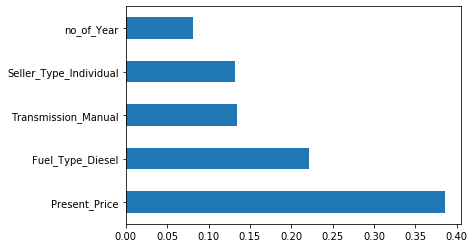

In [123]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(n=5).plot(kind="barh")
plt.show()

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [125]:
X_train.shape, y_train.shape

((240, 8), (240,))

In [126]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

In [127]:
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=15)]
max_depth=[int(x) for x in np.linspace(start=5, stop=30, num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]
max_features=['auto',"sqrt"]

In [128]:
from sklearn.model_selection import RandomizedSearchCV

hyperparameters = {
                        "n_estimators" : n_estimators,
                        "max_depth" : max_depth,
                        "min_samples_split" : min_samples_split,
                        "min_samples_leaf" : min_samples_leaf,
                        "max_features" : max_features
                    }


rand_CV = RandomizedSearchCV(estimator=rf_reg, param_distributions=hyperparameters,n_iter=10, scoring="neg_mean_squared_error", cv=5, verbose=2)

In [129]:
from sklearn.model_selection import RandomizedSearchCV

In [130]:
rand_CV.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1121, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1121, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=1121, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV]  n_estimators=1121, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   6.6s
[CV] n_estimators=1121, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1121, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=  11.4s
[CV] n_estimators=1121, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1121, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   7.2s
[CV] n_estimators=1121, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1121, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   0.5s
[CV] n_estimators=100, min_samples

[CV]  n_estimators=1121, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   8.7s
[CV] n_estimators=1121, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1121, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=  12.5s
[CV] n_estimators=1121, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1121, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   7.4s
[CV] n_estimators=1121, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1121, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=  13.9s
[CV] n_estimators=1121, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1121, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   7.6s
[CV] n_estimators=414, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [131]:
y_pred = rand_CV.predict(X_test)

In [132]:
y_pred

array([ 4.96349547, 21.54245504,  4.45456216,  6.65585536,  5.84633854,
        7.98466594,  1.03531879,  0.54178802,  4.38409976,  2.64399667,
        8.43995244,  2.72852155,  6.5202127 ,  7.16388238,  0.4362391 ,
        7.28084937,  2.99076504,  0.59314655,  0.27980347, 22.92707593,
        3.98763227,  2.88272214,  5.64441313,  2.70691057,  0.59420245,
        4.32174623,  3.63560566,  1.19181194,  1.02223665,  4.50263751,
        0.23555246,  9.56299884, 10.51768474,  2.471978  ,  0.74842799,
        0.19626229, 20.54997267,  3.27252418,  8.62745682,  5.07742862,
        5.3913864 ,  0.28212121,  0.74756309,  2.87374852,  7.07340208,
        4.93106251,  6.2070924 ,  7.2174984 ,  3.55448881,  9.63308392,
        3.56615097,  5.35881461,  5.56973972,  4.28822465,  0.21784492,
        5.80500516,  0.51405297,  5.03936055,  5.44326745,  0.40909139,
        4.01490404])

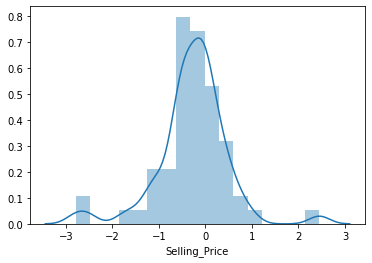

In [133]:
sns.distplot(y_test-y_pred)

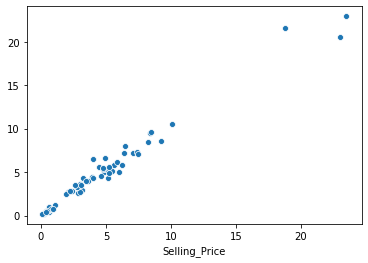

In [134]:
sns.scatterplot(y_test,y_pred)

In [138]:
import pickle
file =open("random_forest_reg_model.pkl", "wb")
pickle.dump(rand_CV,file)